<a href="https://colab.research.google.com/github/biswajitkumarsingh17/Technocolabs/blob/main/Reddit_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Train_v2.csv.zip')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head().T

,0,1,2,3,4
score_hidden,False,False,False,False,False
name,t1_cnat3w8,t1_cnauvlk,t1_cnatevb,t1_cnawqc7,t1_cnb0guo
link_id,t3_2qx5jp,t3_2qvdk9,t3_2kvwjv,t3_2qyv14,t3_2qzk2w
body,Damn near everything belongs to the Lizards.,"He does, I'd be backing away very slowly...","I weigh 285, I guarantee ya I could grab that ...","""This is warm. This is mine.""",Look the baby's father is already ugly as hell...
downs,0,0,0,0,0
created_utc,1420072332,1420076555,1420073046,1420081350,1420092711
score,3,1,-29,130,16
author,giantbfg,tejmar,GregJarnigan,Kanthes,bnerd
distinguished,NaN,NaN,NaN,NaN,NaN
id,cnat3w8,cnauvlk,cnatevb,cnawqc7,cnb0guo


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200090 entries, 0 to 200089
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_hidden            200064 non-null  object 
 1   name                    200064 non-null  object 
 2   link_id                 200064 non-null  object 
 3   body                    200055 non-null  object 
 4   downs                   199940 non-null  object 
 5   created_utc             200000 non-null  object 
 6   score                   200000 non-null  object 
 7   author                  200000 non-null  object 
 8   distinguished           1544 non-null    object 
 9   id                      199960 non-null  object 
 10  archived                199959 non-null  object 
 11  parent_id               200000 non-null  object 
 12  subreddit               200000 non-null  object 
 13  author_flair_css_class  61653 non-null   object 
 14  author_flair_text   

In [7]:
df.shape

(200090, 21)

In [8]:
df_missing_value=df.isnull().sum()
df_missing_value

score_hidden                  26
name                          26
link_id                       26
body                          35
downs                        150
created_utc                   90
score                         90
author                        90
distinguished             198546
id                           130
archived                     131
parent_id                     90
subreddit                     90
author_flair_css_class    138437
author_flair_text         141876
gilded                        90
retrieved_on                  94
ups                          154
controversiality             154
subreddit_id                 154
edited                       154
dtype: int64

In [9]:
(df_missing_value[df_missing_value > 0]/df.shape[0])*100

score_hidden               0.012994
name                       0.012994
link_id                    0.012994
body                       0.017492
downs                      0.074966
created_utc                0.044980
score                      0.044980
author                     0.044980
distinguished             99.228347
id                         0.064971
archived                   0.065471
parent_id                  0.044980
subreddit                  0.044980
author_flair_css_class    69.187366
author_flair_text         70.906092
gilded                     0.044980
retrieved_on               0.046979
ups                        0.076965
controversiality           0.076965
subreddit_id               0.076965
edited                     0.076965
dtype: float64

In [10]:
#df = df[df.body != '[deleted]']
#df = df[df.body != '[removed]']
#df = df[df.body != '']
#print(df.shape)

In [11]:
df_missing_value=df.isnull().sum()
df_missing_value

score_hidden                  26
name                          26
link_id                       26
body                          35
downs                        150
created_utc                   90
score                         90
author                        90
distinguished             198546
id                           130
archived                     131
parent_id                     90
subreddit                     90
author_flair_css_class    138437
author_flair_text         141876
gilded                        90
retrieved_on                  94
ups                          154
controversiality             154
subreddit_id                 154
edited                       154
dtype: int64

In [12]:
(df_missing_value[df_missing_value > 0]/df.shape[0])*100

score_hidden               0.012994
name                       0.012994
link_id                    0.012994
body                       0.017492
downs                      0.074966
created_utc                0.044980
score                      0.044980
author                     0.044980
distinguished             99.228347
id                         0.064971
archived                   0.065471
parent_id                  0.044980
subreddit                  0.044980
author_flair_css_class    69.187366
author_flair_text         70.906092
gilded                     0.044980
retrieved_on               0.046979
ups                        0.076965
controversiality           0.076965
subreddit_id               0.076965
edited                     0.076965
dtype: float64

In [13]:
df.drop(['distinguished', 'author_flair_css_class', 'author_flair_text','link_id','id','parent_id','subreddit_id','name','author'], axis=1, inplace=True)
print(df.shape)

(200090, 12)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200090 entries, 0 to 200089
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   score_hidden      200064 non-null  object 
 1   body              200055 non-null  object 
 2   downs             199940 non-null  object 
 3   created_utc       200000 non-null  object 
 4   score             200000 non-null  object 
 5   archived          199959 non-null  object 
 6   subreddit         200000 non-null  object 
 7   gilded            200000 non-null  object 
 8   retrieved_on      199996 non-null  object 
 9   ups               199936 non-null  float64
 10  controversiality  199936 non-null  float64
 11  edited            199936 non-null  object 
dtypes: float64(2), object(10)
memory usage: 18.3+ MB


In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

score_hidden        0
body                0
downs               0
created_utc         0
score               0
archived            0
subreddit           0
gilded              0
retrieved_on        0
ups                 0
controversiality    0
edited              0
dtype: int64

In [17]:
df.shape

(199931, 12)

In [18]:
df.head()

,score_hidden,body,downs,created_utc,score,archived,subreddit,gilded,retrieved_on,ups,controversiality,edited
0,False,Damn near everything belongs to the Lizards.,0,1420072332,3,False,skyrim,0,1425123882,3.0,0.0,False
1,False,"He does, I'd be backing away very slowly...",0,1420076555,1,False,pic,0,1425123056,1.0,0.0,False
2,False,"I weigh 285, I guarantee ya I could grab that ...",0,1420073046,-29,False,fatpeoplehate,0,1425123740,-29.0,0.0,False
3,False,"""This is warm. This is mine.""",0,1420081350,130,False,AnimalsBeingJerks,0,1425122191,130.0,0.0,False
4,False,Look the baby's father is already ugly as hell...,0,1420092711,16,False,ffxiv,0,1425120427,16.0,0.0,False


In [19]:
df[['score','downs','gilded','created_utc','retrieved_on']] = df[['score','downs','gilded','created_utc','retrieved_on']].astype('int')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199931 entries, 0 to 200089
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   score_hidden      199931 non-null  object 
 1   body              199931 non-null  object 
 2   downs             199931 non-null  int64  
 3   created_utc       199931 non-null  int64  
 4   score             199931 non-null  int64  
 5   archived          199931 non-null  object 
 6   subreddit         199931 non-null  object 
 7   gilded            199931 non-null  int64  
 8   retrieved_on      199931 non-null  int64  
 9   ups               199931 non-null  float64
 10  controversiality  199931 non-null  float64
 11  edited            199931 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 19.8+ MB


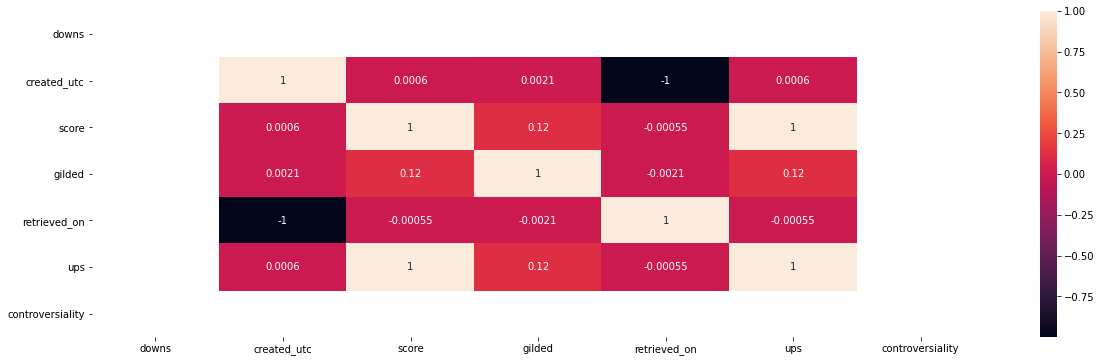

In [21]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True)

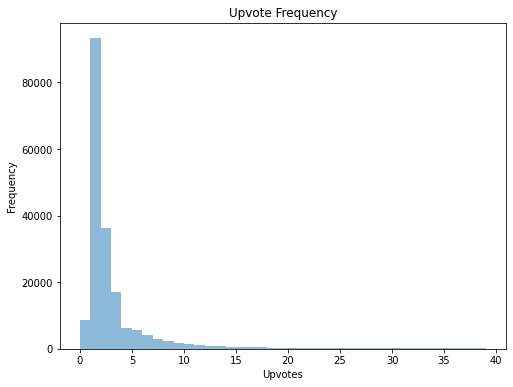

In [22]:
plt.figure(figsize=(8,6))
plt.hist(df['ups'], bins=np.arange(0,40,1), alpha=0.5, label="Upvotes");
plt.title('Upvote Frequency');
plt.xlabel('Upvotes');
plt.ylabel('Frequency');
plt.grid(False)

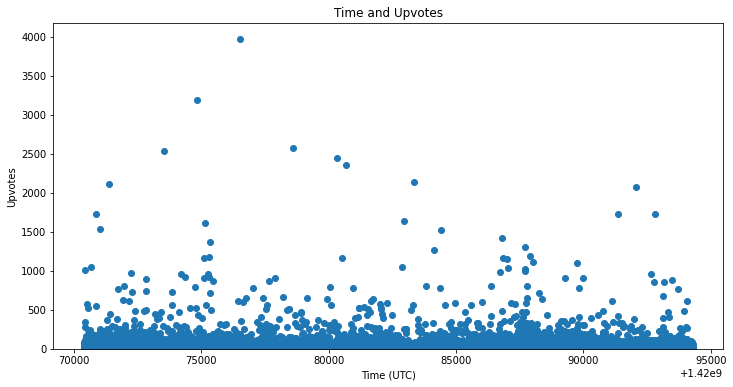

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(df['created_utc'], df['ups']);
plt.title('Time and Upvotes');
plt.xlabel('Time (UTC)');
plt.ylabel('Upvotes');
plt.ylim(ymin=-0.1);
ax = plt.gca();
ax.xaxis.grid(False)

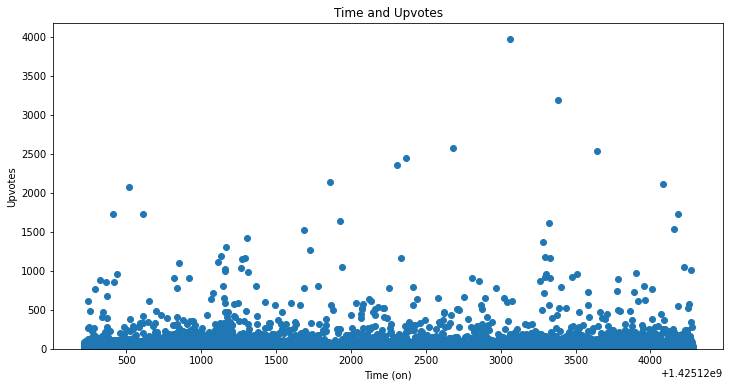

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(df['retrieved_on'], df['ups']);
plt.title('Time and Upvotes');
plt.xlabel('Time (on)');
plt.ylabel('Upvotes');
plt.ylim(ymin=-0.1);
ax = plt.gca();
ax.xaxis.grid(False)

In [25]:
subreddit_=df['subreddit'].value_counts(ascending=False)
subreddit_

AskReddit        15587
CFB               6430
funny             4145
pics              3481
nba               3351
                 ...  
reactjs              1
ifttt                1
Crayfish             1
HeSquats             1
CreepyHistory        1
Name: subreddit, Length: 6693, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


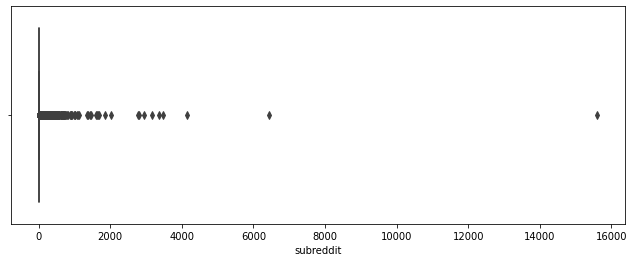

In [26]:
plt.figure(figsize=(11,4))
sns.boxplot(subreddit_)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


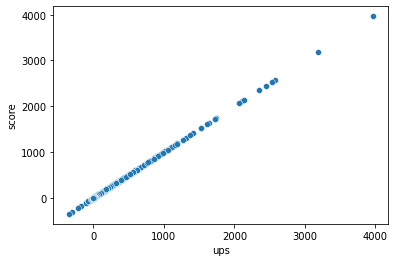

In [27]:
sns.scatterplot(df.ups,df.score)

In [28]:
df.columns

Index(['score_hidden', 'body', 'downs', 'created_utc', 'score', 'archived',
       'subreddit', 'gilded', 'retrieved_on', 'ups', 'controversiality',
       'edited'],
      dtype='object')

In [29]:
df['score_hidden'].value_counts()

False    199186
True        745
Name: score_hidden, dtype: int64

In [30]:
df['body'].value_counts()

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                      12917
Hi there, looks like you're wanting to discuss something related to the new year; thankfully, we have a dedicated thread for that! [Go here to participate!](http://redd.it/2qxd1t)  Happy holidays!\n\n*[I am a bot](/r/AutoModerator/comments/q11pu/what_is_automoderator/), and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose?to=%2Fr%2FAskReddit) if you have any questions or concerns.*      212
Thanks!                                                                                       

In [31]:
df['archived'].value_counts()

False    196454
False      3477
Name: archived, dtype: int64

In [32]:
df['gilded'].value_counts()

0    199795
1       134
2         2
Name: gilded, dtype: int64

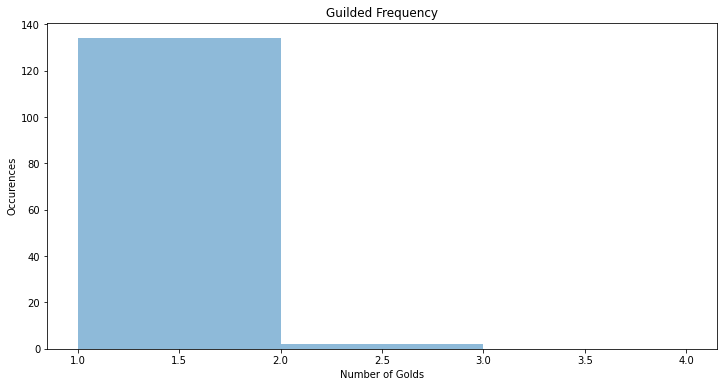

In [33]:
plt.figure(figsize=(12,6))
plt.hist(df['gilded'], bins=np.arange(1,5,1), alpha=0.5, label="Gilded");
plt.title('Guilded Frequency');
plt.xlabel('Number of Golds');
plt.ylabel('Occurences');
plt.grid(False)

In [34]:
df['ups'].value_counts()

 1.0       93254
 2.0       36411
 3.0       17173
 0.0        8560
 4.0        6141
           ...  
 605.0         1
 560.0         1
-302.0         1
 1114.0        1
 258.0         1
Name: ups, Length: 542, dtype: int64

In [35]:
df['edited'].value_counts()

False         194610
1420077948         4
1420078705         3
1420085952         3
1420075860         3
               ...  
1420128255         1
1420085795         1
1420074332         1
1420084368         1
1420076018         1
Name: edited, Length: 5001, dtype: int64

In [36]:
df.describe()

,downs,created_utc,score,gilded,retrieved_on,ups,controversiality
count,199931.0,1.999310e+05,199931.000000,199931.000000,1.999310e+05,199931.000000,199931.0
mean,0.0,1.420081e+09,4.354047,0.000690,1.425122e+09,4.354047,0.0
std,0.0,6.849003e+03,30.951330,0.026642,1.174182e+03,30.951330,0.0
min,0.0,1.420070e+09,-353.000000,0.000000,1.425120e+09,-353.000000,0.0
25%,0.0,1.420075e+09,1.000000,0.000000,1.425121e+09,1.000000,0.0
50%,0.0,1.420081e+09,1.000000,0.000000,1.425122e+09,1.000000,0.0
75%,0.0,1.420087e+09,3.000000,0.000000,1.425123e+09,3.000000,0.0
max,0.0,1.420094e+09,3967.000000,2.000000,1.425124e+09,3967.000000,0.0


In [37]:
df.describe(include='object')

,score_hidden,body,archived,subreddit,edited
count,199931,199931,199931,199931,199931
unique,2,182169,2,6693,5001
top,False,[deleted],False,AskReddit,False
freq,199186,12917,196454,15587,194610


In [38]:
df['character_count'] = df['body'].map(lambda x : len(x))

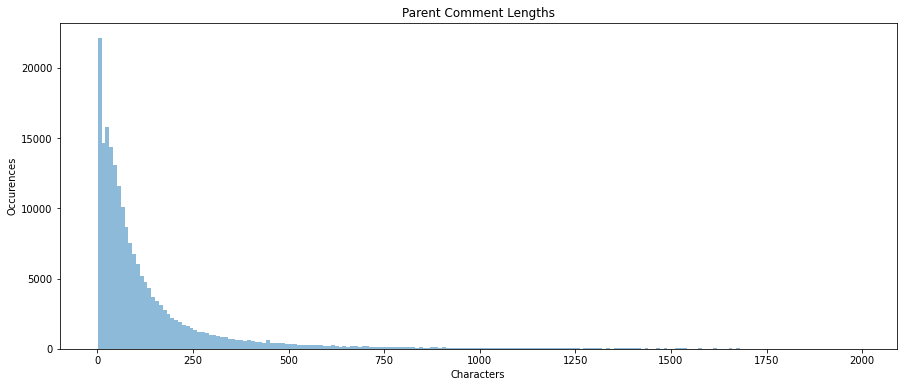

In [39]:
plt.figure(figsize=(15,6))
plt.hist(df['character_count'], bins=np.arange(1,2000,10), alpha=0.5, label="Character Lengths");
plt.title('Parent Comment Lengths');
plt.xlabel('Characters');
plt.ylabel('Occurences');
plt.grid(False);

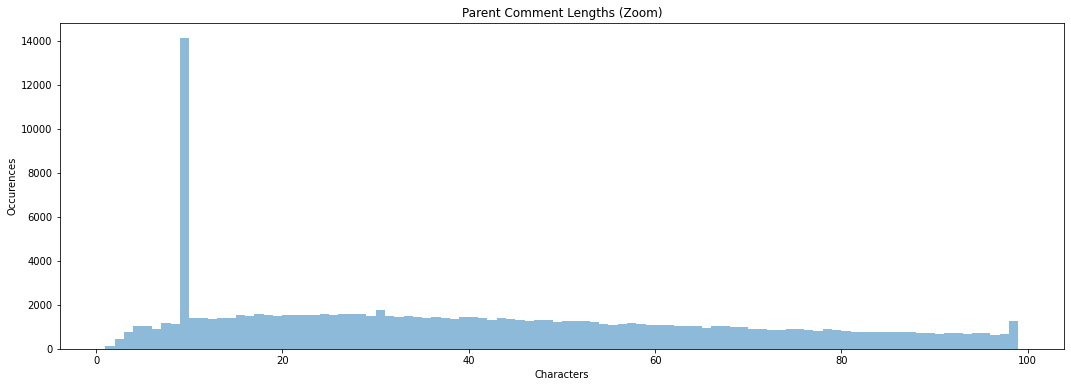

In [40]:
plt.figure(figsize=(18,6))
plt.hist(df['character_count'], bins=np.arange(1,100,1), alpha=0.5, label="Character Lengths");
plt.title('Parent Comment Lengths (Zoom)');
plt.xlabel('Characters');
plt.ylabel('Occurences');
ax = plt.gca()
ax.xaxis.grid(False)

In [41]:
from datetime import datetime

In [42]:
datetime.fromtimestamp(df.created_utc[0])

datetime.datetime(2015, 1, 1, 0, 32, 12)

In [43]:
df.created_utc = df.created_utc.apply(lambda x: datetime.fromtimestamp(x))

In [44]:
df.created_utc

0        2015-01-01 00:32:12
1        2015-01-01 01:42:35
2        2015-01-01 00:44:06
3        2015-01-01 03:02:30
4        2015-01-01 06:11:51
                 ...        
200085   2015-01-01 06:20:51
200086   2015-01-01 02:57:51
200087   2015-01-01 00:41:01
200088   2015-01-01 03:09:02
200089   2015-01-01 05:42:19
Name: created_utc, Length: 199931, dtype: datetime64[ns]

In [45]:
df['created_utc_year'] = df.created_utc.dt.year
df['created_utc_month'] = df.created_utc.dt.month
df['created_utc_week'] = df.created_utc.dt.week
df['created_utc_day'] = df.created_utc.dt.day
df['created_utc_hour'] = df.created_utc.dt.hour
df['created_utc_minute'] = df.created_utc.dt.minute
df['created_utc_dayofweek'] = df.created_utc.dt.dayofweek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
df.drop('created_utc',axis=1,inplace=True)

In [47]:
datetime.fromtimestamp(df.retrieved_on[0])

datetime.datetime(2015, 2, 28, 11, 44, 42)

In [48]:
df.retrieved_on = df.retrieved_on.apply(lambda x: datetime.fromtimestamp(x))

In [49]:
df.retrieved_on

0        2015-02-28 11:44:42
1        2015-02-28 11:30:56
2        2015-02-28 11:42:20
3        2015-02-28 11:16:31
4        2015-02-28 10:47:07
                 ...        
200085   2015-02-28 10:45:54
200086   2015-02-28 11:17:19
200087   2015-02-28 11:42:56
200088   2015-02-28 11:15:26
200089   2015-02-28 10:51:17
Name: retrieved_on, Length: 199931, dtype: datetime64[ns]

In [50]:
df['retrieved_on_year'] = df.retrieved_on.dt.year
df['retrieved_on_month'] = df.retrieved_on.dt.month
df['retrieved_on_week'] = df.retrieved_on.dt.week
df['retrieved_on_day'] = df.retrieved_on.dt.day
df['retrieved_on_hour'] = df.retrieved_on.dt.hour
df['retrieved_on_minute'] = df.retrieved_on.dt.minute
df['retrieved_on_dayofweek'] = df.retrieved_on.dt.dayofweek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df.drop('retrieved_on',axis=1,inplace=True)

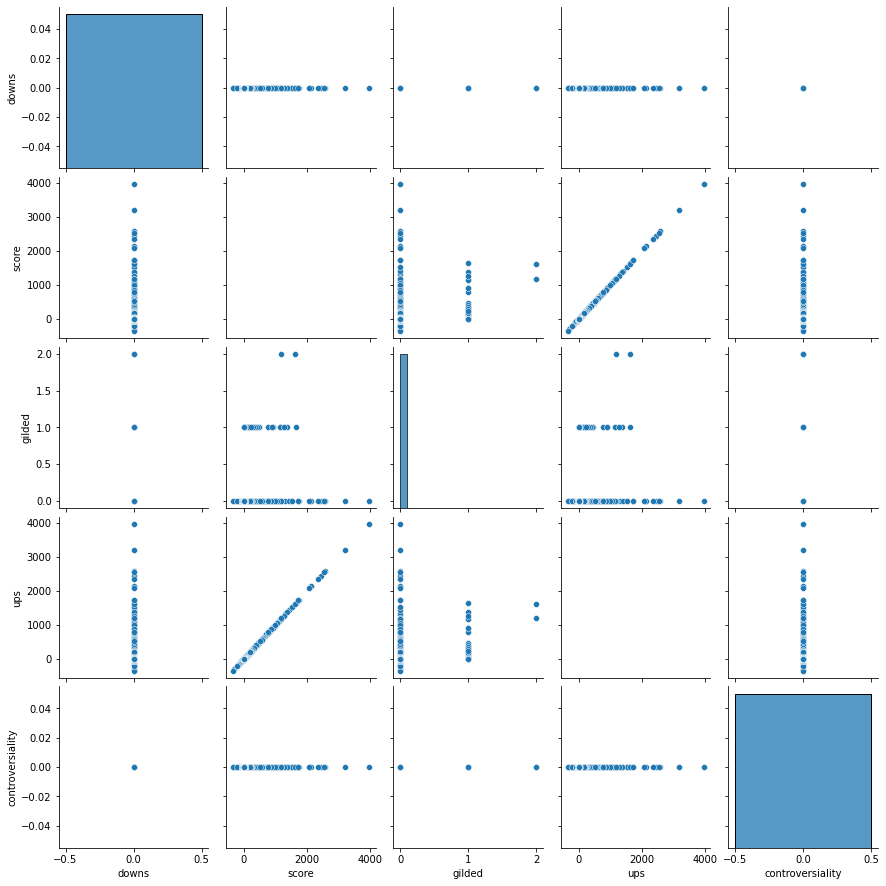

In [52]:
sns.pairplot(df[['downs', 'score', 'subreddit','gilded', 'ups', 'controversiality', 'edited']])

In [53]:
df['archived'].value_counts()

False    196454
False      3477
Name: archived, dtype: int64

In [54]:
df1 = df

In [55]:
dummy = pd.get_dummies(df[['archived','score_hidden']],drop_first=True)
dummy

,archived_False,score_hidden_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200085,0,0
200086,0,0
200087,0,0
200088,0,0


In [56]:
df = pd.concat([df,dummy],axis=1)
df.drop(['archived','score_hidden'],axis=1,inplace=True)

In [57]:
df.drop('edited',axis=1,inplace=True)

In [58]:
df.head()

,body,downs,score,subreddit,gilded,ups,controversiality,character_count,created_utc_year,created_utc_month,created_utc_week,created_utc_day,created_utc_hour,created_utc_minute,created_utc_dayofweek,retrieved_on_year,retrieved_on_month,retrieved_on_week,retrieved_on_day,retrieved_on_hour,retrieved_on_minute,retrieved_on_dayofweek,archived_False,score_hidden_True
0,Damn near everything belongs to the Lizards.,0,3,skyrim,0,3.0,0.0,44,2015,1,1,1,0,32,3,2015,2,9,28,11,44,5,1,0
1,"He does, I'd be backing away very slowly...",0,1,pic,0,1.0,0.0,43,2015,1,1,1,1,42,3,2015,2,9,28,11,30,5,1,0
2,"I weigh 285, I guarantee ya I could grab that ...",0,-29,fatpeoplehate,0,-29.0,0.0,83,2015,1,1,1,0,44,3,2015,2,9,28,11,42,5,1,0
3,"""This is warm. This is mine.""",0,130,AnimalsBeingJerks,0,130.0,0.0,29,2015,1,1,1,3,2,3,2015,2,9,28,11,16,5,1,0
4,Look the baby's father is already ugly as hell...,0,16,ffxiv,0,16.0,0.0,259,2015,1,1,1,6,11,3,2015,2,9,28,10,47,5,1,0


In [59]:
len(df.columns)

24

In [60]:
df.select_dtypes(include=['object'])

,body,subreddit
0,Damn near everything belongs to the Lizards.,skyrim
1,"He does, I'd be backing away very slowly...",pic
2,"I weigh 285, I guarantee ya I could grab that ...",fatpeoplehate
3,"""This is warm. This is mine.""",AnimalsBeingJerks
4,Look the baby's father is already ugly as hell...,ffxiv
...,...,...
200085,wow. The first source seems like dogshit. But ...,news
200086,There isn't much of a difference. In a lot def...,AskWomen
200087,"Lamy Safari, Cross Bailey, Lamy 2000, and the ...",fountainpens
200088,"Also, maybe you guys can socialize while accom...",introvert


In [61]:
import nltk

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords
# Initialize the stopwords
stoplist = stopwords.words('english')

In [65]:
import gensim

In [66]:
from gensim.models import Word2Vec

In [67]:
sentences = [nltk.word_tokenize(words) for words in df1.body]

In [68]:
model = Word2Vec(sentences,min_count=1)

In [69]:
ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]
ordered_vocab = sorted(ordered_vocab, key=lambda k: k[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
word_vectors = pd.DataFrame(model.wv.syn0[term_indices, :], index=ordered_terms)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [70]:
word_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
putz,0.004325,0.027180,-0.005540,-0.007446,0.014656,0.009890,0.002804,0.008556,-0.017606,-0.021250,-0.019356,0.013362,-0.006463,0.005976,-0.002331,0.006857,0.013889,0.003745,0.011017,0.007026,-0.008409,0.004462,-0.003288,0.018800,-0.000579,0.000674,0.005690,0.009350,-0.002559,-0.007885,0.003464,0.010432,0.010621,-0.004848,-0.004781,0.013443,-0.006710,-0.000747,-0.018543,-0.009887,...,0.014952,-0.012990,-0.012121,0.008223,-0.004357,-0.026066,-0.026240,0.015459,0.008065,0.013389,-0.012593,0.007830,0.010516,-0.009986,-0.002023,-0.001339,-0.004330,0.008535,-0.005116,0.008444,-0.008774,0.000066,-0.006781,-0.000730,0.009336,0.000808,-0.010383,-0.002615,0.008805,-0.004822,0.009068,0.002234,0.007646,0.012929,0.005256,0.007044,0.000289,-0.017035,-0.004092,-0.003780
knee-cap,0.000233,0.004852,0.015068,-0.009043,-0.004818,-0.015447,-0.003289,-0.008391,-0.003449,-0.011164,-0.016387,0.002688,-0.018900,0.021775,0.011970,0.028253,-0.009405,0.004150,-0.005468,0.011798,-0.019573,0.013701,-0.008485,0.006473,-0.009524,-0.003337,-0.017120,-0.021189,-0.010484,-0.003544,0.011615,-0.006492,0.001272,0.003688,0.008938,0.005583,0.014392,0.005865,0.008664,0.027339,...,0.016136,0.019770,0.006910,-0.002753,0.001944,0.019407,-0.003527,0.008339,0.021131,-0.003104,0.000973,0.025257,0.002797,-0.004261,0.027375,-0.029085,-0.006995,0.020868,-0.013731,-0.011071,-0.012528,0.005103,-0.013150,0.001983,0.006215,0.020323,-0.016288,0.006249,0.014952,-0.012947,-0.009754,-0.012685,0.001419,-0.007543,-0.012438,-0.015853,0.004196,-0.012248,0.017489,-0.007448
sperged,-0.008339,-0.010742,-0.008261,0.003814,-0.015179,-0.015270,-0.002415,0.011315,0.009181,-0.006192,0.058229,-0.017628,-0.004861,-0.001805,0.010853,-0.008922,-0.043244,0.009240,0.004785,0.040997,-0.030945,0.006856,-0.020574,-0.011522,0.004007,-0.009467,0.010254,-0.012290,0.022037,0.003563,0.017947,0.004192,0.016180,-0.013173,0.008963,0.004975,-0.004453,-0.029107,0.025213,0.010138,...,0.002833,0.005491,0.003896,0.003152,0.008035,-0.001446,-0.014229,-0.005940,0.009780,0.010592,0.035249,0.002337,-0.017189,-0.019418,-0.006243,0.002730,-0.027488,-0.010443,0.010000,-0.006693,0.003906,-0.009845,0.012674,0.022649,0.000172,0.016518,-0.005507,0.022602,0.007992,-0.002893,0.006873,0.007464,0.005557,0.005097,-0.005038,-0.011696,-0.021470,-0.015119,0.009223,0.015105
statments,0.006232,-0.004503,-0.004011,0.007232,-0.002189,-0.003935,0.008129,-0.000401,0.015719,0.022597,0.009309,-0.004725,-0.000574,0.016589,-0.002447,-0.010891,-0.017444,-0.003635,-0.010363,0.014117,-0.004246,-0.001413,0.000318,0.004442,-0.017736,-0.004213,-0.021427,-0.018297,-0.003230,0.003024,0.009554,-0.003330,0.005855,-0.010135,0.006645,-0.005453,-0.009888,-0.014367,0.002524,0.024436,...,-0.004235,-0.001888,0.003954,0.008190,0.003888,0.008775,-0.010111,-0.004068,0.029263,0.007976,-0.003578,0.005759,0.010928,-0.006272,0.004078,-0.002677,-0.013668,0.003253,-0.014365,0.007373,0.000677,0.009194,-0.018611,0.005759,-0.012461,-0.000992,0.011434,0.019296,-0.000501,-0.000840,-0.005913,-0.003327,-0.007833,-0.014833,0.022562,-0.010512,-0.006735,0.002216,-0.001085,0.013797
marvelverse,0.003509,-0.004246,-0.010438,0.008912,0.002594,-0.010173,-0.022800,-0.015524,-0.011918,-0.004192,-0.009796,-0.018731,-0.002155,0.005433,0.003681,-0.001871,0.002599,0.001615,0.013489,0.001891,-0.001417,0.002754,0.001279,-0.008255,0.011828,-0.009387,0.006585,0.004476,-0.001349,-0.007518,-0.000758,0.000035,0.025774,0.005475,-0.005479,-0.010171,0.005713,0.004114,0.000573,-0.006314,...,0.005233,-0.004255,-0.001329,0.006459,-0.005605,-0.001810,-0.019565,-0.016449,-0.007132,-0.005159,-0.009909,-0.000468,0.009634,0.002765,0.018153,0.001026,0.000162,-0.001174,-0.009387,0.000786,-0.014717,-0.015464,0.001388,-0.001809,-0.008090,0.016142,0.002891,-0.002940,0.001471,0.000

In [71]:
df2 = df

In [72]:
df2.shape

(199931, 24)

In [73]:
word_vectors.drop(word_vectors.tail(3051).index,inplace=True)

In [74]:
word_vectors.shape

(199931, 100)

In [75]:
indices = word_vectors.index

In [76]:
indices

Index(['putz', 'knee-cap', 'sperged', 'statments', 'marvelverse', '43.65',
       '2619', '2147', '2091', '/u/Transcendentist',
       ...
       'factors', 'latest', 'valuable', 'repost', 'significantly', 'Hard',
       'famous', 'dislike', 'audience', 'hat'],
      dtype='object', length=199931)

In [77]:
word_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
putz,0.004325,0.027180,-0.005540,-0.007446,0.014656,0.009890,0.002804,0.008556,-0.017606,-0.021250,-0.019356,0.013362,-0.006463,0.005976,-0.002331,0.006857,0.013889,0.003745,0.011017,0.007026,-0.008409,0.004462,-0.003288,0.018800,-0.000579,0.000674,0.005690,0.009350,-0.002559,-0.007885,0.003464,0.010432,0.010621,-0.004848,-0.004781,0.013443,-0.006710,-0.000747,-0.018543,-0.009887,...,0.014952,-0.012990,-0.012121,0.008223,-0.004357,-0.026066,-0.026240,0.015459,0.008065,0.013389,-0.012593,0.007830,0.010516,-0.009986,-0.002023,-0.001339,-0.004330,0.008535,-0.005116,0.008444,-0.008774,0.000066,-0.006781,-0.000730,0.009336,0.000808,-0.010383,-0.002615,0.008805,-0.004822,0.009068,0.002234,0.007646,0.012929,0.005256,0.007044,0.000289,-0.017035,-0.004092,-0.003780
knee-cap,0.000233,0.004852,0.015068,-0.009043,-0.004818,-0.015447,-0.003289,-0.008391,-0.003449,-0.011164,-0.016387,0.002688,-0.018900,0.021775,0.011970,0.028253,-0.009405,0.004150,-0.005468,0.011798,-0.019573,0.013701,-0.008485,0.006473,-0.009524,-0.003337,-0.017120,-0.021189,-0.010484,-0.003544,0.011615,-0.006492,0.001272,0.003688,0.008938,0.005583,0.014392,0.005865,0.008664,0.027339,...,0.016136,0.019770,0.006910,-0.002753,0.001944,0.019407,-0.003527,0.008339,0.021131,-0.003104,0.000973,0.025257,0.002797,-0.004261,0.027375,-0.029085,-0.006995,0.020868,-0.013731,-0.011071,-0.012528,0.005103,-0.013150,0.001983,0.006215,0.020323,-0.016288,0.006249,0.014952,-0.012947,-0.009754,-0.012685,0.001419,-0.007543,-0.012438,-0.015853,0.004196,-0.012248,0.017489,-0.007448
sperged,-0.008339,-0.010742,-0.008261,0.003814,-0.015179,-0.015270,-0.002415,0.011315,0.009181,-0.006192,0.058229,-0.017628,-0.004861,-0.001805,0.010853,-0.008922,-0.043244,0.009240,0.004785,0.040997,-0.030945,0.006856,-0.020574,-0.011522,0.004007,-0.009467,0.010254,-0.012290,0.022037,0.003563,0.017947,0.004192,0.016180,-0.013173,0.008963,0.004975,-0.004453,-0.029107,0.025213,0.010138,...,0.002833,0.005491,0.003896,0.003152,0.008035,-0.001446,-0.014229,-0.005940,0.009780,0.010592,0.035249,0.002337,-0.017189,-0.019418,-0.006243,0.002730,-0.027488,-0.010443,0.010000,-0.006693,0.003906,-0.009845,0.012674,0.022649,0.000172,0.016518,-0.005507,0.022602,0.007992,-0.002893,0.006873,0.007464,0.005557,0.005097,-0.005038,-0.011696,-0.021470,-0.015119,0.009223,0.015105
statments,0.006232,-0.004503,-0.004011,0.007232,-0.002189,-0.003935,0.008129,-0.000401,0.015719,0.022597,0.009309,-0.004725,-0.000574,0.016589,-0.002447,-0.010891,-0.017444,-0.003635,-0.010363,0.014117,-0.004246,-0.001413,0.000318,0.004442,-0.017736,-0.004213,-0.021427,-0.018297,-0.003230,0.003024,0.009554,-0.003330,0.005855,-0.010135,0.006645,-0.005453,-0.009888,-0.014367,0.002524,0.024436,...,-0.004235,-0.001888,0.003954,0.008190,0.003888,0.008775,-0.010111,-0.004068,0.029263,0.007976,-0.003578,0.005759,0.010928,-0.006272,0.004078,-0.002677,-0.013668,0.003253,-0.014365,0.007373,0.000677,0.009194,-0.018611,0.005759,-0.012461,-0.000992,0.011434,0.019296,-0.000501,-0.000840,-0.005913,-0.003327,-0.007833,-0.014833,0.022562,-0.010512,-0.006735,0.002216,-0.001085,0.013797
marvelverse,0.003509,-0.004246,-0.010438,0.008912,0.002594,-0.010173,-0.022800,-0.015524,-0.011918,-0.004192,-0.009796,-0.018731,-0.002155,0.005433,0.003681,-0.001871,0.002599,0.001615,0.013489,0.001891,-0.001417,0.002754,0.001279,-0.008255,0.011828,-0.009387,0.006585,0.004476,-0.001349,-0.007518,-0.000758,0.000035,0.025774,0.005475,-0.005479,-0.010171,0.005713,0.004114,0.000573,-0.006314,...,0.005233,-0.004255,-0.001329,0.006459,-0.005605,-0.001810,-0.019565,-0.016449,-0.007132,-0.005159,-0.009909,-0.000468,0.009634,0.002765,0.018153,0.001026,0.000162,-0.001174,-0.009387,0.000786,-0.014717,-0.015464,0.001388,-0.001809,-0.008090,0.016142,0.002891,-0.002940,0.001471,0.000

In [78]:
df2.shape

(199931, 24)

In [79]:
word_vectors.shape

(199931, 100)

In [80]:
df3 = pd.DataFrame(np.hstack([df2,word_vectors]))

In [81]:
df3.shape

(199931, 124)

In [82]:
df3.isnull().any().sum()

0

In [83]:
column_indices = range(123)
new_names = df2.columns
old_names = df3.columns[column_indices]
df3.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [84]:
df3.drop(['body','subreddit'],axis=1,inplace=True)

In [85]:
df4 = df3

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [87]:
X = df4.drop('ups',axis=1)
y = df4['ups']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [89]:
print(X_train.shape)
print(X_test.shape)

(139951, 121)
(59980, 121)


In [90]:
lr = LinearRegression().fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [91]:
lr.score(X_test,y_test)

1.0

In [92]:
lr.score(X_train,y_train)

1.0

In [93]:
def lr_predict(downs,score,gilded,controversiality):
  x = np.zeros(len(X.columns))
  x[0] = downs
  x[1] = score
  x[2] = gilded
  x[3] = controversiality

  return lr.predict([x])[0]

In [94]:
upvotes_predicted = lr_predict(10,150,10,11)
upvotes_predicted.round()

150.0

In [95]:
result = lr_predict(100,1,1,1)
print(f"Upvotes predicted is : {result.round()}")

Upvotes predicted is : 1.0


In [96]:
import pickle

In [97]:
with open('linear_model','wb') as f:
  pickle.dump(lr,f)

In [98]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(y_test,knn_pred)

6.3283087695898645

In [101]:
def knn_predict(downs,score,gilded,controversiality):
  x = np.zeros(len(X.columns))
  x[0] = downs
  x[1] = score
  x[2] = gilded
  x[3] = controversiality

  return knn.predict([x])[0]

In [102]:
single_pred_knn = knn_predict(10,150,10,11)

single_pred_knn

144.2

In [103]:
result = knn_predict(100,1,1,1)

print(f"Upvotes predicted is : {result}")

Upvotes predicted is : 1.2


In [108]:
with open('knn_model','wb') as f:
  pickle.dump(knn,f)